In [1]:
import seaborn as sns # visualization
import math as m 
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\courses\AI All\Amit Machin Learning\Data\salary.csv")
print("Dataset size")
print(cl("Rows {} Columns {}".format(df.shape[0], df.shape[1]), attrs = ['bold'], color = 'black'))
df.head()

Dataset size
Rows 32561 Columns 15


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [4]:
new = pd.DataFrame(df['salary'].str.split('=', 0, expand=True)[1]).rename({0:'1'})
new['salary'] = pd.DataFrame(new[1].str.split('K',0,expand = True)[0])
new.drop(1,axis = 1,inplace = True)
new

,salary
1,50
1,50
2,50
3,50
4,50
...,...
32556,50
32557,None
32558,50
32559,50


In [5]:
from sklearn.impute import SimpleImputer
median = SimpleImputer(missing_values = np.nan,strategy = 'median')
for col in new:
    
    new['salary'] = median.fit_transform(new[['salary']])
    print('number of null {} in {}'.format(new['salary'].isna().sum(),'salary'))
    print('########' * 30)
new['salary'] = new['salary'].astype('int')*1000
new['salary'].head()

number of null 0 in salary
################################################################################################################################################################################################################################################


1    50000
1    50000
2    50000
3    50000
4    50000
Name: salary, dtype: int32

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.drop('salary',axis = 1,inplace = True)
df = pd.concat([df,new])
df['salary']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
32556    50000.0
32557    50000.0
32558    50000.0
32559    50000.0
32560    50000.0
Name: salary, Length: 65122, dtype: float64

In [8]:
df['salary'] = median.fit_transform(df[['salary']])
print('number of null {} in {}'.format(df['salary'].isna().sum(),'salary'))
print('########' * 30)

number of null 0 in salary
################################################################################################################################################################################################################################################


In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,50000.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,50000.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,50000.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,50000.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
32557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
32558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0
32559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0


In [10]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

,dtype
age,float64
workclass,object
fnlwgt,float64
education,object
education-num,float64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [11]:
df.describe(include = 'all').T.fillna(0)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,0,0,0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561.0,9,Private,22696,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
fnlwgt,32561.0,0,0,0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561.0,16,HS-grad,10501,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
education-num,32561.0,0,0,0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
marital-status,32561.0,7,Married-civ-spouse,14976,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
occupation,32561.0,15,Prof-specialty,4140,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
relationship,32561.0,6,Husband,13193,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
race,32561.0,5,White,27816,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
sex,32561.0,2,Male,21790,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [12]:
df.duplicated().sum()

32585

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,50000.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,50000.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,50000.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,50000.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,50000.0
32558,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,50000.0
32559,22.0,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,50000.0
32560,52.0,Self-emp-inc,287927.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,50000.0


In [15]:
pd.DataFrame(df.info()).rename(columns = {0:'Index',1:'dtype',2:'See Null',3:'Dtype'})

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 1
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32536 non-null  float64
 1   workclass       32536 non-null  object 
 2   fnlwgt          32536 non-null  float64
 3   education       32536 non-null  object 
 4   education-num   32536 non-null  float64
 5   marital-status  32536 non-null  object 
 6   occupation      32536 non-null  object 
 7   relationship    32536 non-null  object 
 8   race            32536 non-null  object 
 9   sex             32536 non-null  object 
 10  capital-gain    32536 non-null  float64
 11  capital-loss    32536 non-null  float64
 12  hours-per-week  32536 non-null  float64
 13  native-country  32536 non-null  object 
 14  salary          32537 non-null  float64
dtypes: float64(7), object(8)
memory usage: 4.0+ MB


""


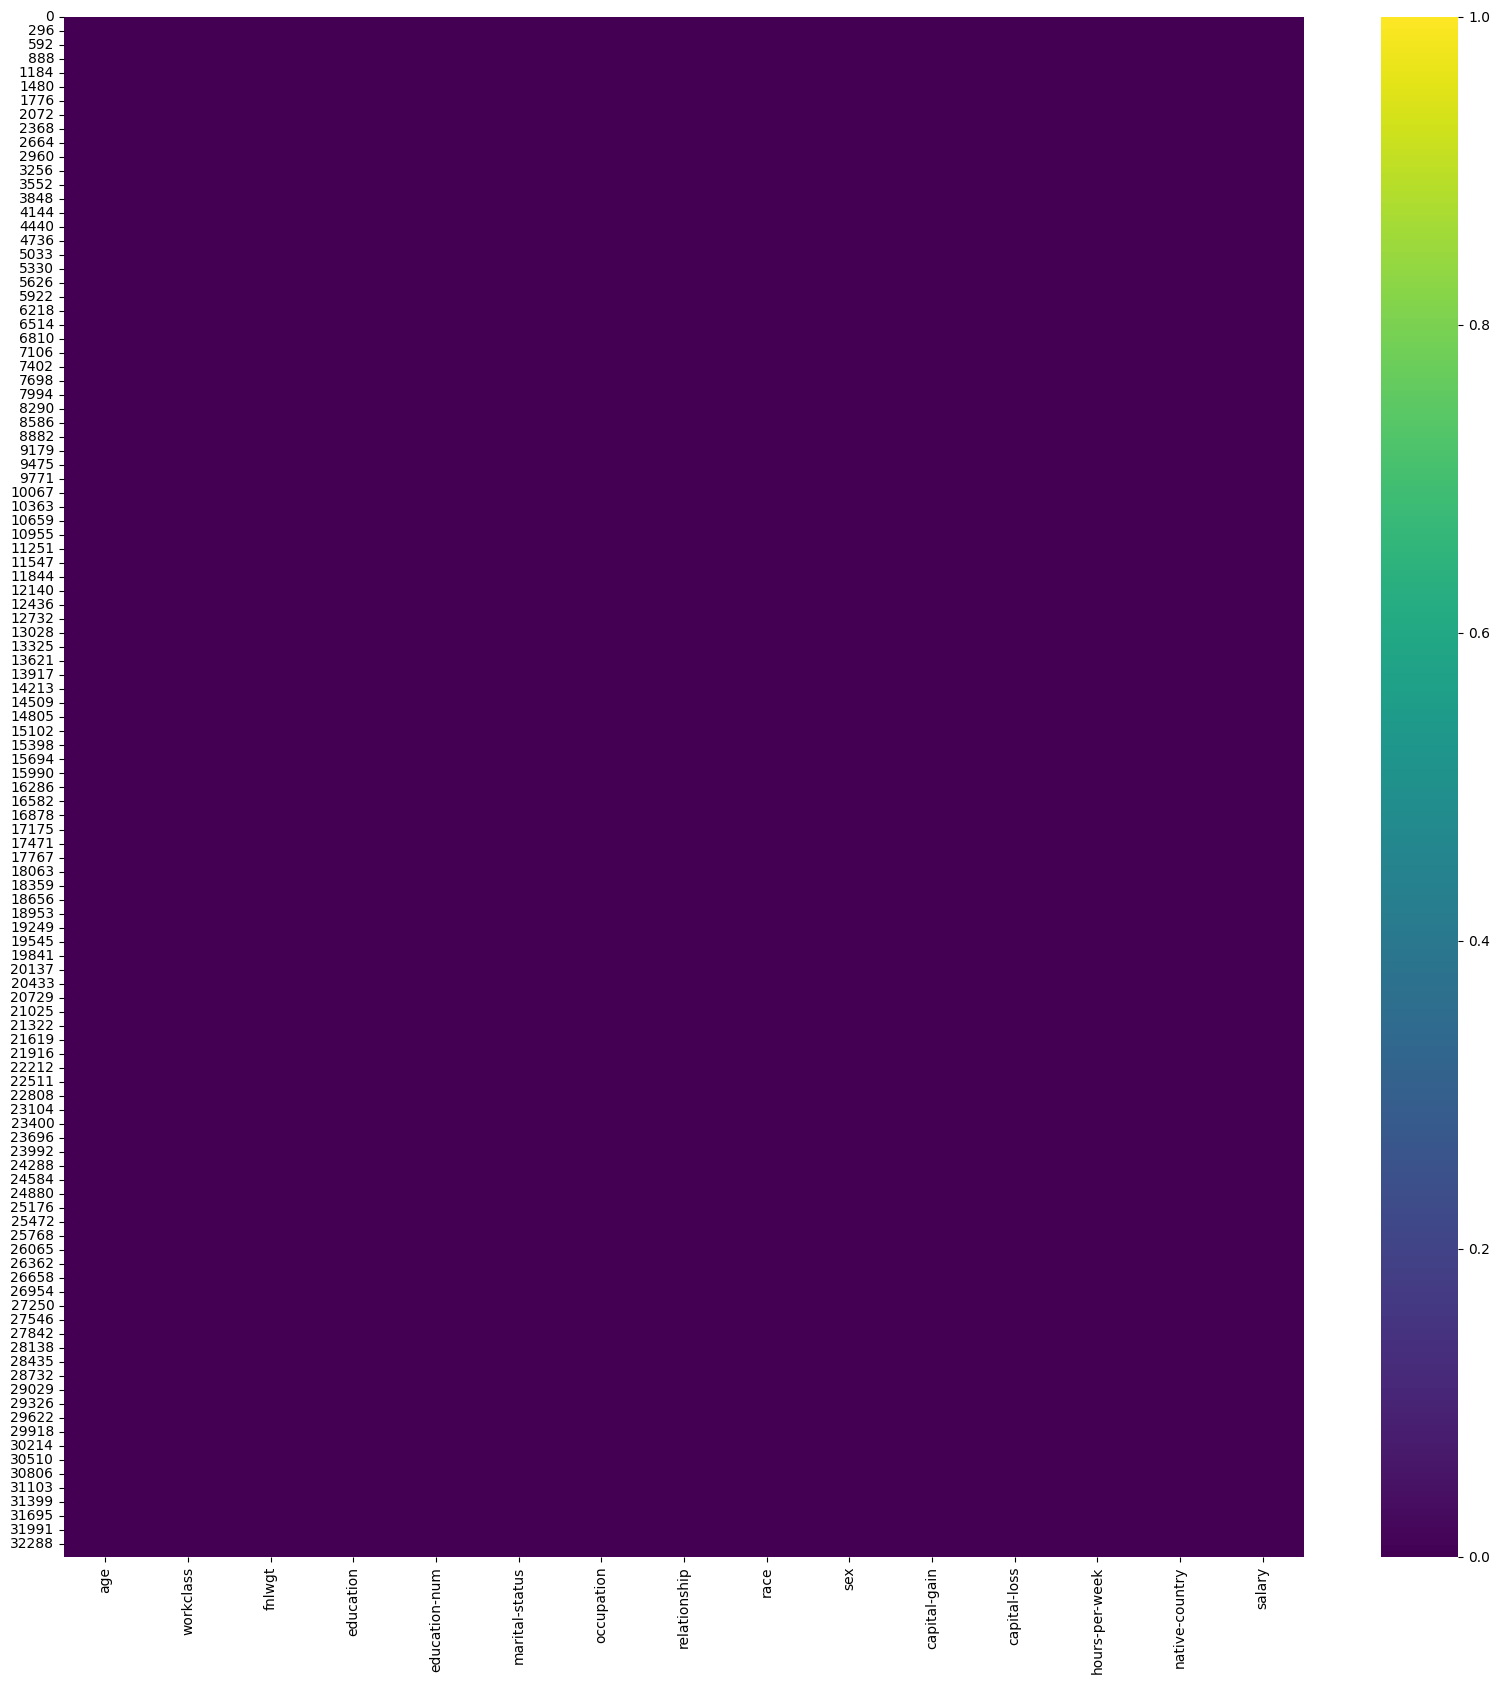

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [17]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
age,1
workclass,1
fnlwgt,1
education,1
education-num,1
marital-status,1
occupation,1
relationship,1
race,1
sex,1


In [18]:
from sklearn.impute import SimpleImputer
mode = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
median = SimpleImputer(missing_values = np.nan,strategy = 'median')
for col in df:
    print('number of null {} in {}'.format(df[col].isna().sum(),col))
    if df[col].dtype=='object':
        df[col] = mode.fit_transform(df[[col]])
        
    else:
        df[col] = median.fit_transform(df[[col]])
    print('number of null {} in {}'.format(df[col].isna().sum(),col))
    print('########' * 30)

number of null 1 in age
number of null 0 in age
################################################################################################################################################################################################################################################
number of null 1 in workclass
number of null 0 in workclass
################################################################################################################################################################################################################################################
number of null 1 in fnlwgt
number of null 0 in fnlwgt
################################################################################################################################################################################################################################################
number of null 1 in education
number of null 0 in education
#######################################################

In [19]:
pd.DataFrame(df.mean()).rename(columns = {0:'Mean'})

,Mean
age,38.585487
fnlwgt,189782.082921
education-num,10.081722
capital-gain,1078.443741
capital-loss,87.368227
hours-per-week,40.440329
salary,50000.000000


In [20]:
med = pd.DataFrame(df.median()).rename(columns = {0:'median'})
med

,median
age,37.0
fnlwgt,178356.0
education-num,10.0
capital-gain,0.0
capital-loss,0.0
hours-per-week,40.0
salary,50000.0


In [21]:
max = pd.DataFrame(df.max()).rename(columns = {0:'Maxmimum'})
max

,Maxmimum
age,90.0
workclass,Without-pay
fnlwgt,1484705.0
education,Some-college
education-num,16.0
marital-status,Widowed
occupation,Transport-moving
relationship,Wife
race,White
sex,Male


In [22]:
min = pd.DataFrame(df.min()).rename(columns = {0:'Minimum'})
min

,Minimum
age,17.0
workclass,?
fnlwgt,12285.0
education,10th
education-num,1.0
marital-status,Divorced
occupation,?
relationship,Husband
race,Amer-Indian-Eskimo
sex,Female


In [23]:
for i,row in min.iterrows():
    try:
        above_35 = df[df[i] > row[0]]
        print(cl("column is: {} Rows: {} ".format(i,above_35.shape[0]), attrs = ['bold'], color = 'black'))
    except:
        pass

column is: age Rows: 32142 
column is: workclass Rows: 30701 
column is: fnlwgt Rows: 32536 
column is: education Rows: 31604 
column is: education-num Rows: 32487 
column is: marital-status Rows: 28096 
column is: occupation Rows: 30694 
column is: relationship Rows: 19350 
column is: race Rows: 32226 
column is: sex Rows: 21775 
column is: capital-gain Rows: 2712 
column is: capital-loss Rows: 1519 
column is: hours-per-week Rows: 32517 
column is: native-country Rows: 31955 
column is: salary Rows: 0 


In [24]:
for i,row in med.iterrows():
    try:
        above_35 = df[df[i] > row[0]]
        print(cl("column is :{} above median number of  Rows: {} ".format(i,above_35.shape[0]), attrs = ['bold'], color = 'black'))
        print(cl("####"*30))
    except:
        pass

column is :age above median number of  Rows: 15870 
########################################################################################################################
column is :fnlwgt above median number of  Rows: 16267 
########################################################################################################################
column is :education-num above median number of  Rows: 10512 
########################################################################################################################
column is :capital-gain above median number of  Rows: 2712 
########################################################################################################################
column is :capital-loss above median number of  Rows: 1519 
########################################################################################################################
column is :hours-per-week above median number of  Rows: 9576 
############################################

In [25]:
for (i, row1), (j, row2) in zip(min.iterrows(), max.iterrows()):
    try:
        class_min_max = df[df[i].isin([float(row1[0]),float(row2[0])])]
        print("count of '{}' is in min and max is : {}".format(i,class_min_max.shape[0]))
        print("Rows :{}".format(class_min_max.shape[0]))
        print('###'*30)
    except:
        pass

count of 'age' is in min and max is : 437
Rows :437
##########################################################################################
count of 'fnlwgt' is in min and max is : 2
Rows :2
##########################################################################################
count of 'education-num' is in min and max is : 463
Rows :463
##########################################################################################
count of 'capital-gain' is in min and max is : 29984
Rows :29984
##########################################################################################
count of 'capital-loss' is in min and max is : 31021
Rows :31021
##########################################################################################
count of 'hours-per-week' is in min and max is : 105
Rows :105
##########################################################################################
count of 'salary' is in min and max is : 32537
Rows :32537
#####################################

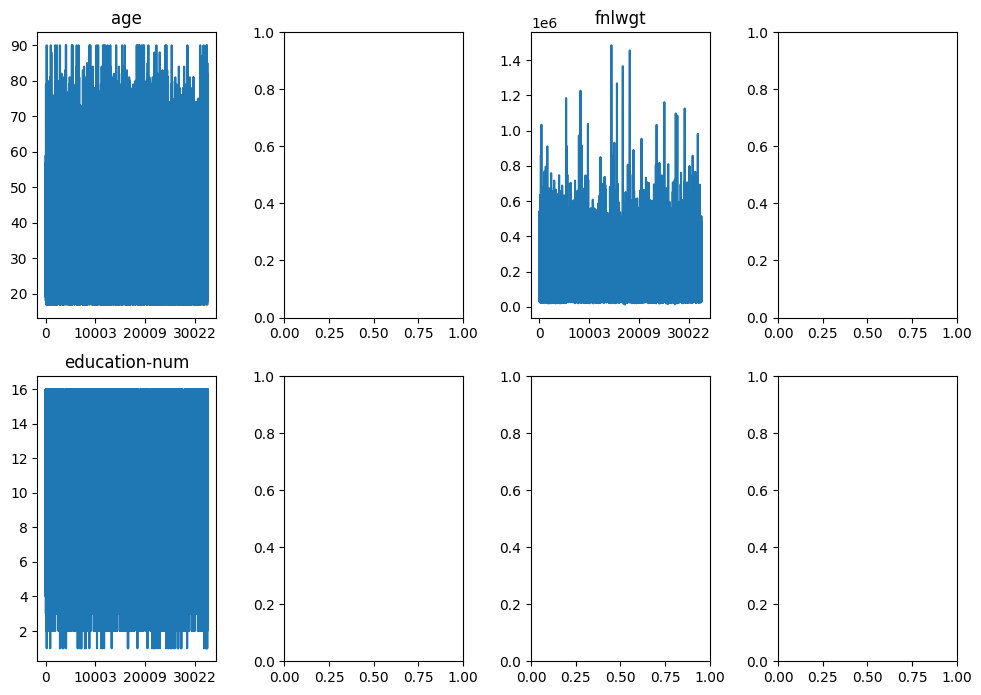

In [26]:
feature_list = df.columns
fig = plt.figure(figsize = (10,7))

for i in range(len(feature_list)):
    try:
        col = feature_list[i]
        sub = fig.add_subplot(2,4,i+1)
        chart = df[col].plot()
        chart.set_title(col)
    except:
        pass
plt.tight_layout(pad = 0.9)

In [27]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,50000.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,50000.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,50000.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,50000.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,50000.0


In [28]:
pd.DataFrame(df.groupby(["education","age", "fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]).sum())

salary
education     age  fnlwgt   education-num capital-gain capital-loss hours-per-week         
 10th         17.0 25051.0  6.0           0.0          0.0          16.0            50000.0
                   25690.0  6.0           0.0          0.0          10.0            50000.0
                   27032.0  6.0           0.0          0.0          12.0            50000.0
                   31007.0  6.0           0.0          0.0          30.0            50000.0
                   32607.0  6.0           0.0          0.0          20.0            50000.0
...                                                                                     ...
 Some-college 90.0 52386.0  10.0          0.0          0.0          35.0            50000.0
                   139660.0 10.0          0.0          0.0          37.0            50000.0
                   171956.0 10.0          0.0          0.0          40.0            50000.0
                   225063.0 10.0          0.0          0.0          10.0            50000.0
                   282095.0 10.0          0.0          0.0          40.0            50000.0

[32335 rows x 1 columns]

In [29]:
pd.DataFrame(df.groupby("education")["fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"].sum())

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,
10th,1.836447e+08,5598.0,377468.0,53037.0,34570.0
11th,2.290405e+08,8225.0,252740.0,58843.0,39863.0
12th,8.620922e+07,3464.0,123010.0,14002.0,15493.0
1st-4th,3.981092e+07,332.0,21147.0,8119.0,6347.0
5th-6th,7.716516e+07,996.0,58615.0,22728.0,12898.0
7th-8th,1.214679e+08,2580.0,151125.0,42422.0,25391.0
9th,1.040773e+08,2570.0,175834.0,14905.0,19555.0
Assoc-acdm,2.063835e+08,12804.0,683306.0,99678.0,43218.0
Assoc-voc,2.514356e+08,15202.0,988201.0,100547.0,57506.0


In [30]:
pd.DataFrame(df[["fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]].mean())

,0
fnlwgt,189782.082921
education-num,10.081722
capital-gain,1078.443741
capital-loss,87.368227
hours-per-week,40.440329


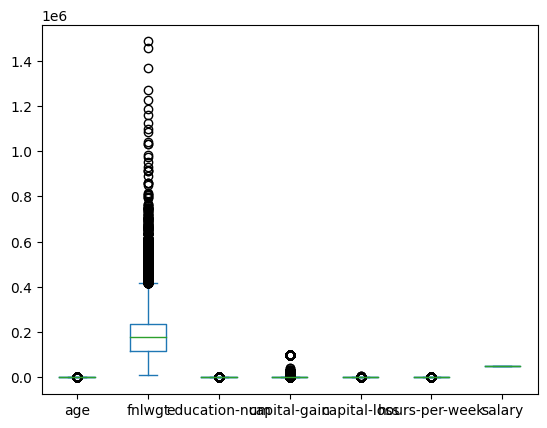

In [31]:
df.plot.box()
plt.show()

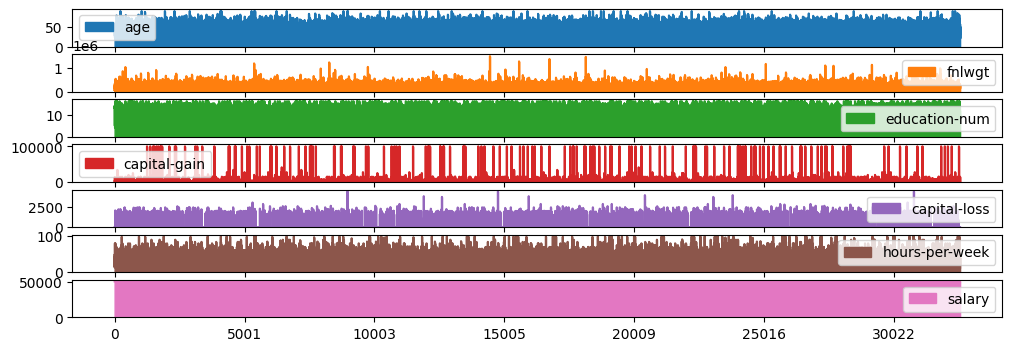

In [32]:
axs = df.plot.area(figsize=(12, 4), subplots=True)
plt.show()

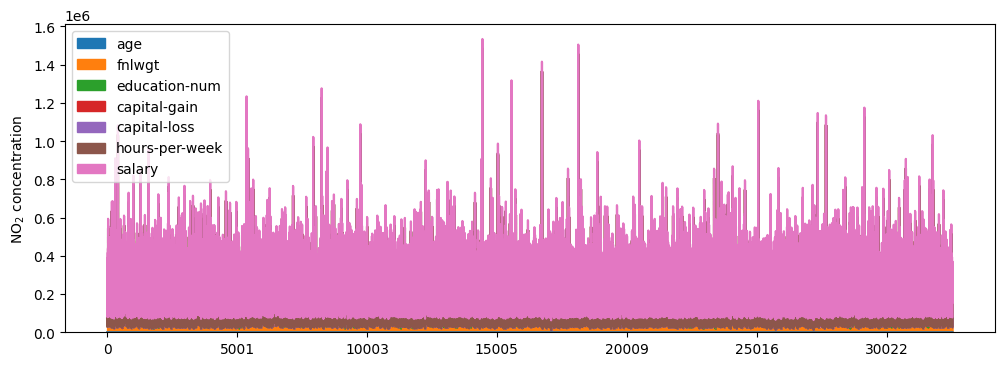

In [33]:
fig, axs = plt.subplots(figsize=(12, 4))      
df.plot.area(ax=axs)                  
axs.set_ylabel("NO$_2$ concentration")                  
plt.show()  

In [34]:
pd.DataFrame(df.sort_values(by="education"))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
10038,42.0,Private,91836.0,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,50000.0
18696,55.0,Private,101338.0,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,50000.0
9557,38.0,?,129150.0,10th,6.0,Separated,?,Own-child,White,Male,0.0,0.0,35.0,United-States,50000.0
15066,29.0,Private,131714.0,10th,6.0,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0.0,0.0,25.0,United-States,50000.0
16681,34.0,Self-emp-not-inc,276221.0,10th,6.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,40.0,United-States,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27042,26.0,Private,369166.0,Some-college,10.0,Never-married,Farming-fishing,Other-relative,White,Female,0.0,0.0,65.0,United-States,50000.0
6220,55.0,Private,323706.0,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,1902.0,40.0,United-States,50000.0
27040,42.0,Private,29393.0,Some-college,10.0,Divorced,Machine-op-inspct,Not-in-family,White,Female,0.0,0.0,40.0,United-States,50000.0
6221,34.0,Private,316470.0,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,50000.0


In [35]:
size = pd.DataFrame(df.groupby("education").size()).rename(columns = {0:'Count'})
size

,Count
education,
10th,933
11th,1175
12th,433
1st-4th,166
5th-6th,332
7th-8th,645
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [36]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,50000.0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,50000.0
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,50000.0
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,50000.0
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,50000.0


In [37]:
df.agg(
    {
        "fnlwgt": ["min", "max", "median", "skew", "mean"],
        "capital-gain": ["min", "max", "median","skew", "mean"],
    }
)


,fnlwgt,capital-gain
min,1.228500e+04,0.000000
max,1.484705e+06,99999.000000
median,1.783560e+05,0.000000
skew,1.447687e+00,11.949403
mean,1.897821e+05,1078.443741


In [38]:
def f(x):
    return len(str(x))

pd.DataFrame(df.applymap(f))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,4,10,7,10,4,14,13,14,6,5,6,3,4,14,7
1,4,17,7,10,4,19,16,8,6,5,3,3,4,14,7
2,4,8,8,8,3,9,18,14,6,5,3,3,4,14,7
3,4,8,8,5,3,19,18,8,6,5,3,3,4,14,7
4,4,8,8,10,4,19,15,5,6,7,3,3,4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,4,8,8,8,3,19,18,8,6,5,3,3,4,14,7
32558,4,8,8,8,3,8,13,10,6,7,3,3,4,14,7
32559,4,8,8,8,3,14,13,10,6,5,3,3,4,14,7
32560,4,13,8,8,3,19,16,5,6,7,7,3,4,14,7


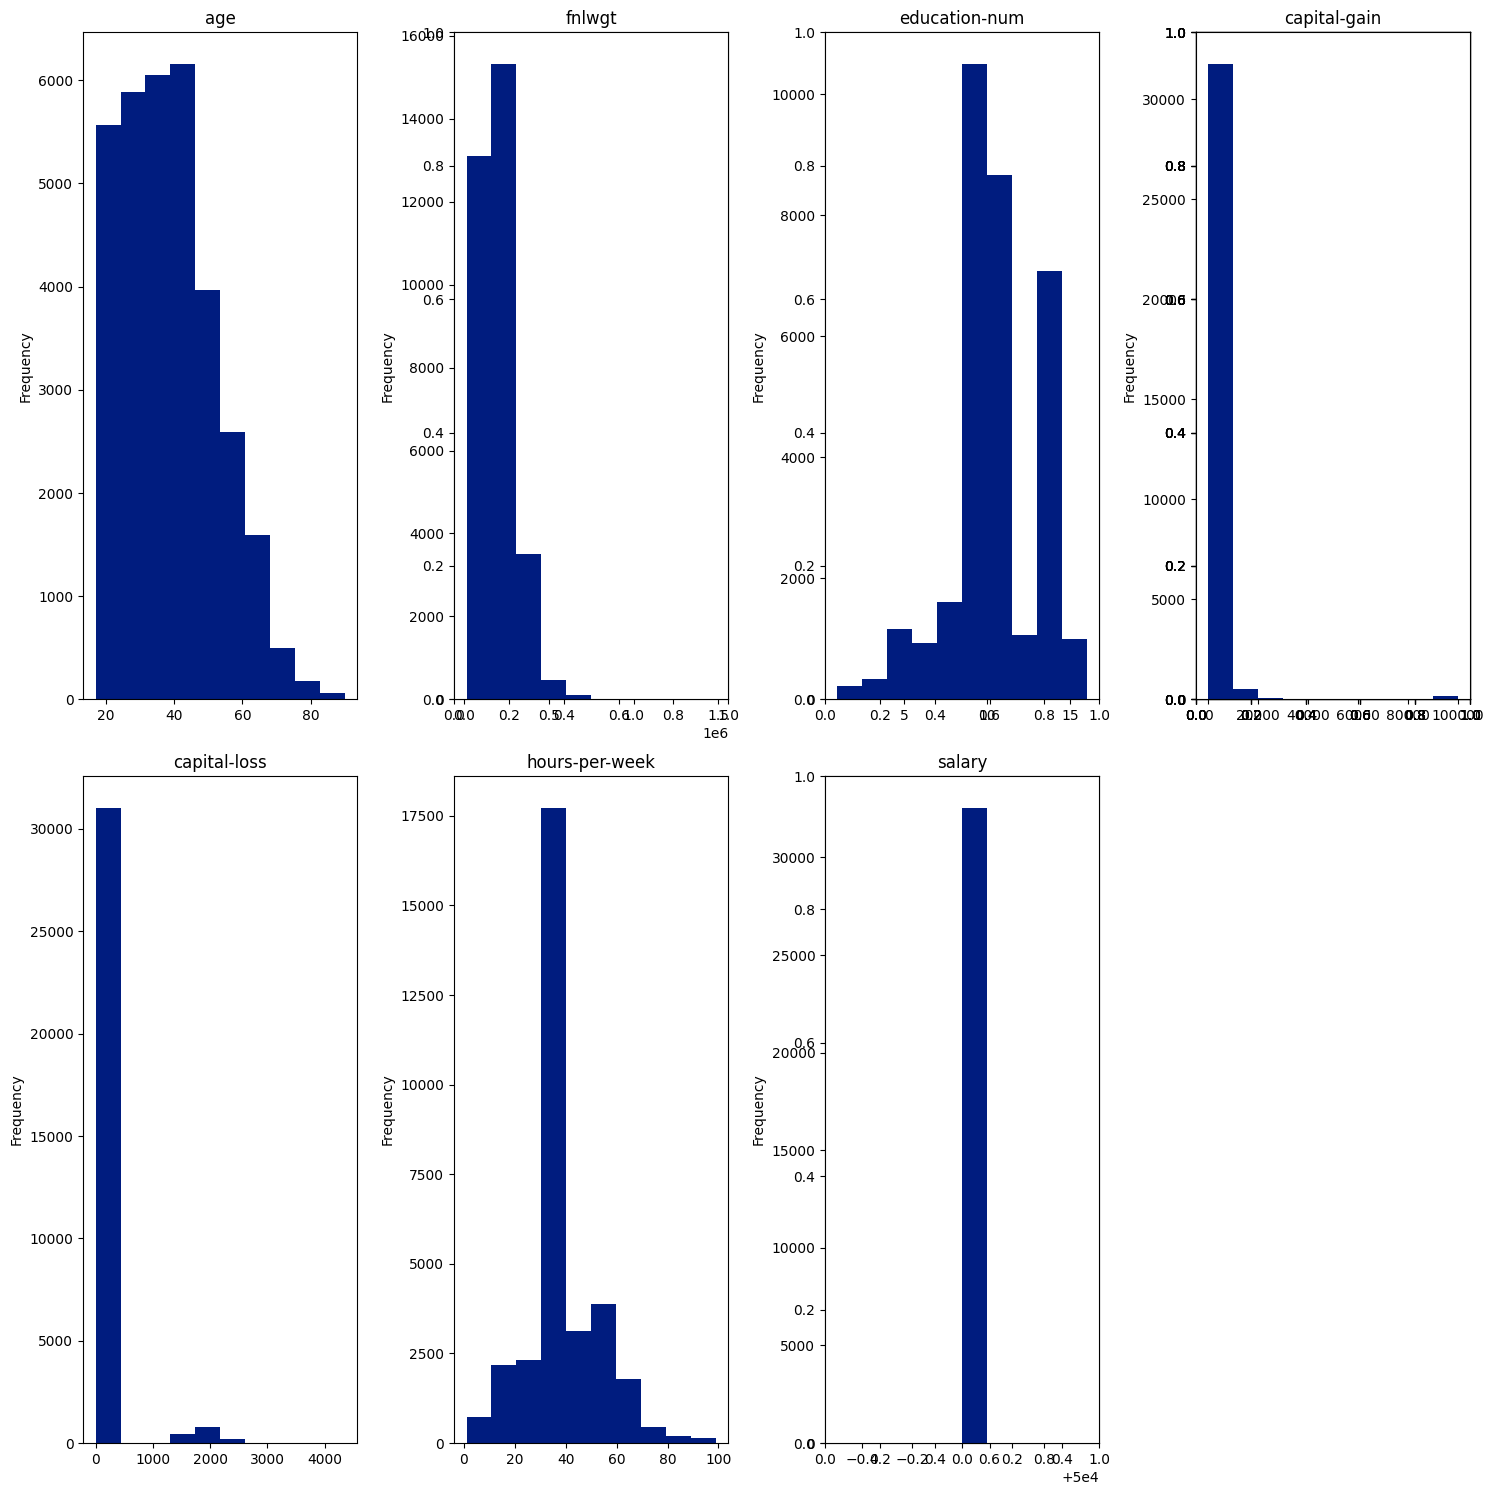

In [39]:
fig = plt.figure(figsize=(15,15))
plt.style.use('seaborn-dark-palette')
i = 0
for col in df:
    try:
        sub = fig.add_subplot(2,4,i+1)
        df[col].plot(kind = 'hist')
        sub.set_title(col)
        i += 1
    except:
        pass
plt.tight_layout(pad = 0.9)

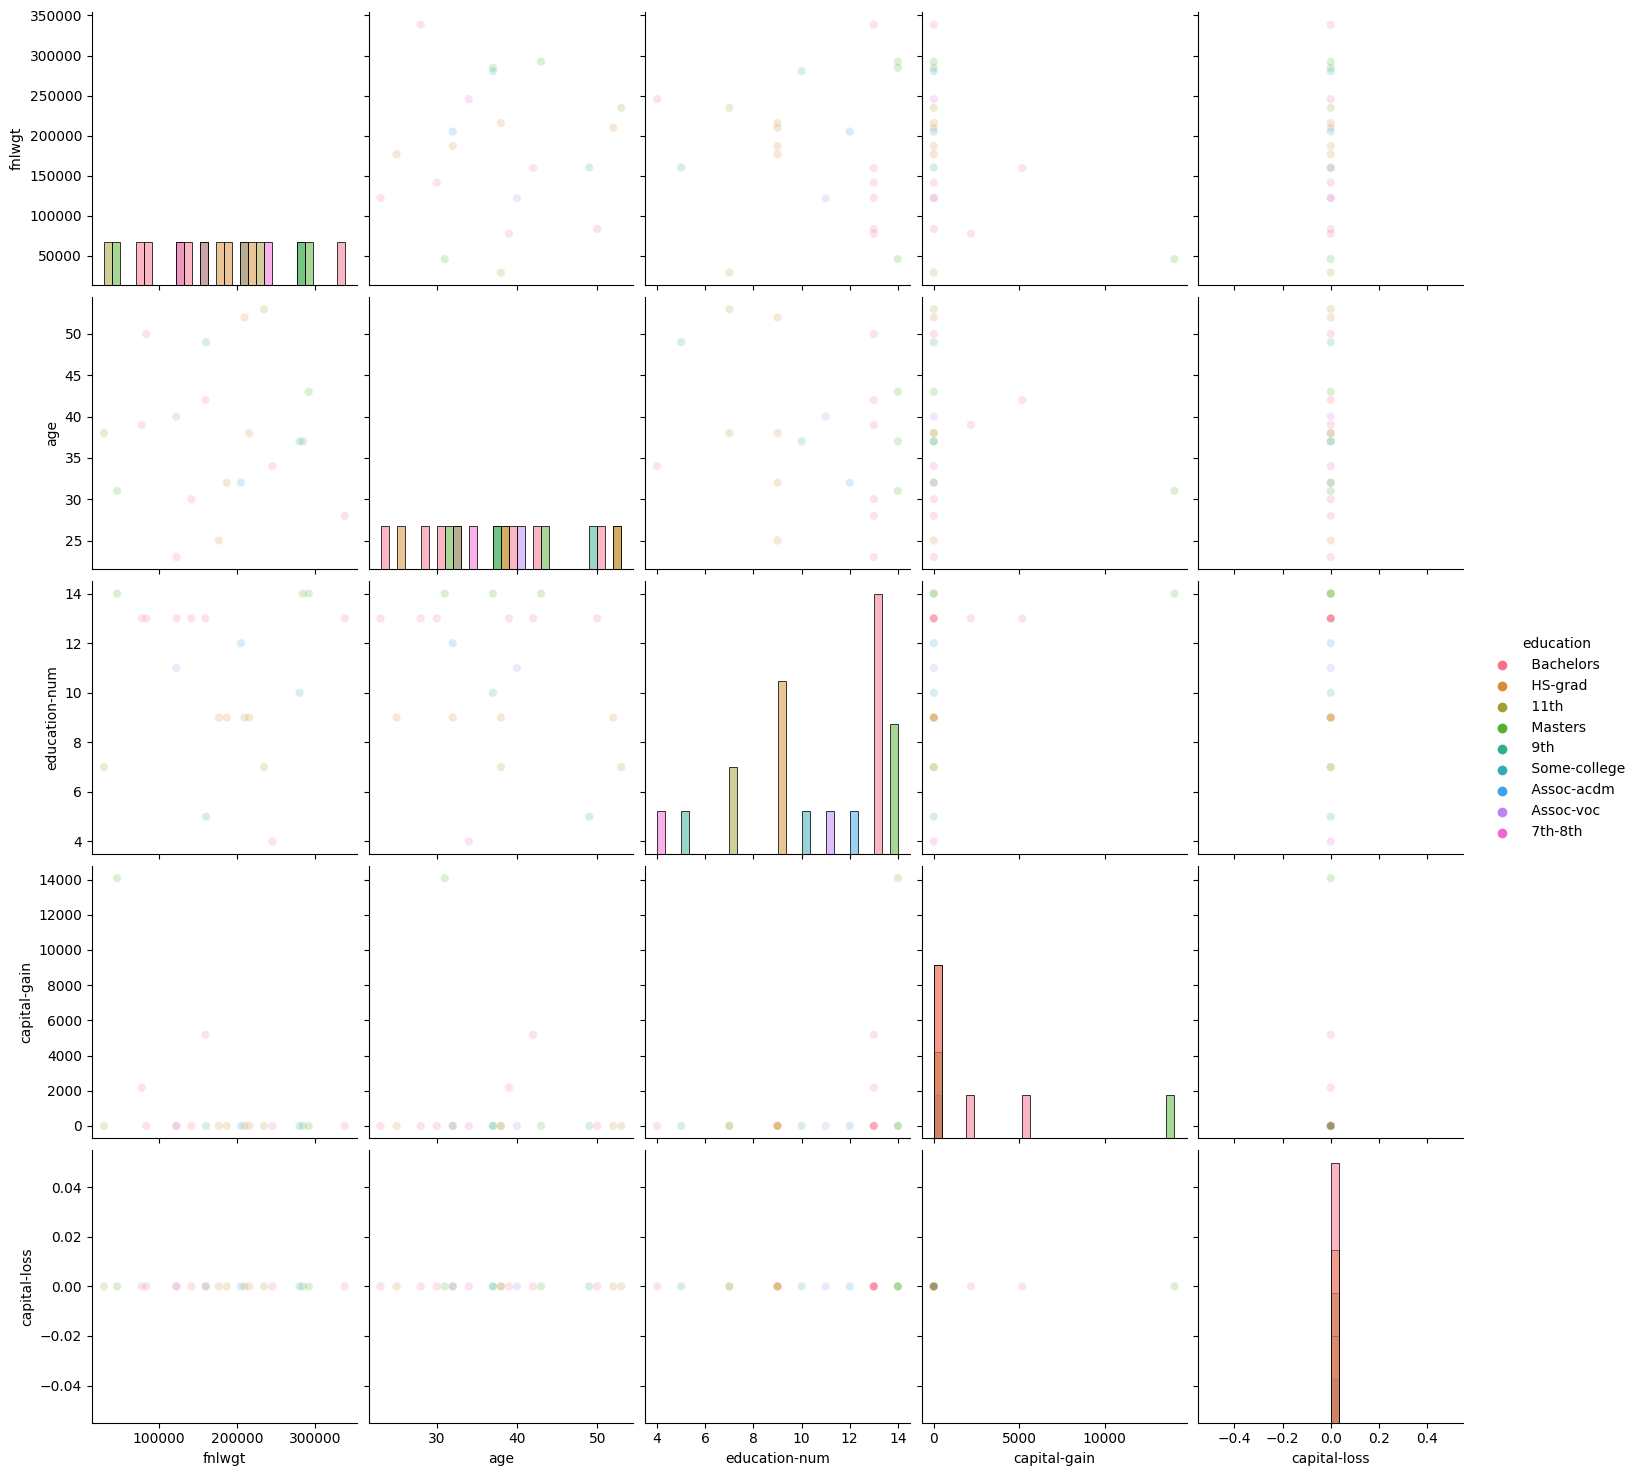

In [40]:
n_samples_to_plot = 20
target_column = "education"
columns = ["fnlwgt", "age","education-num","capital-gain","capital-loss"]
_ = sns.pairplot(
    data=df[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

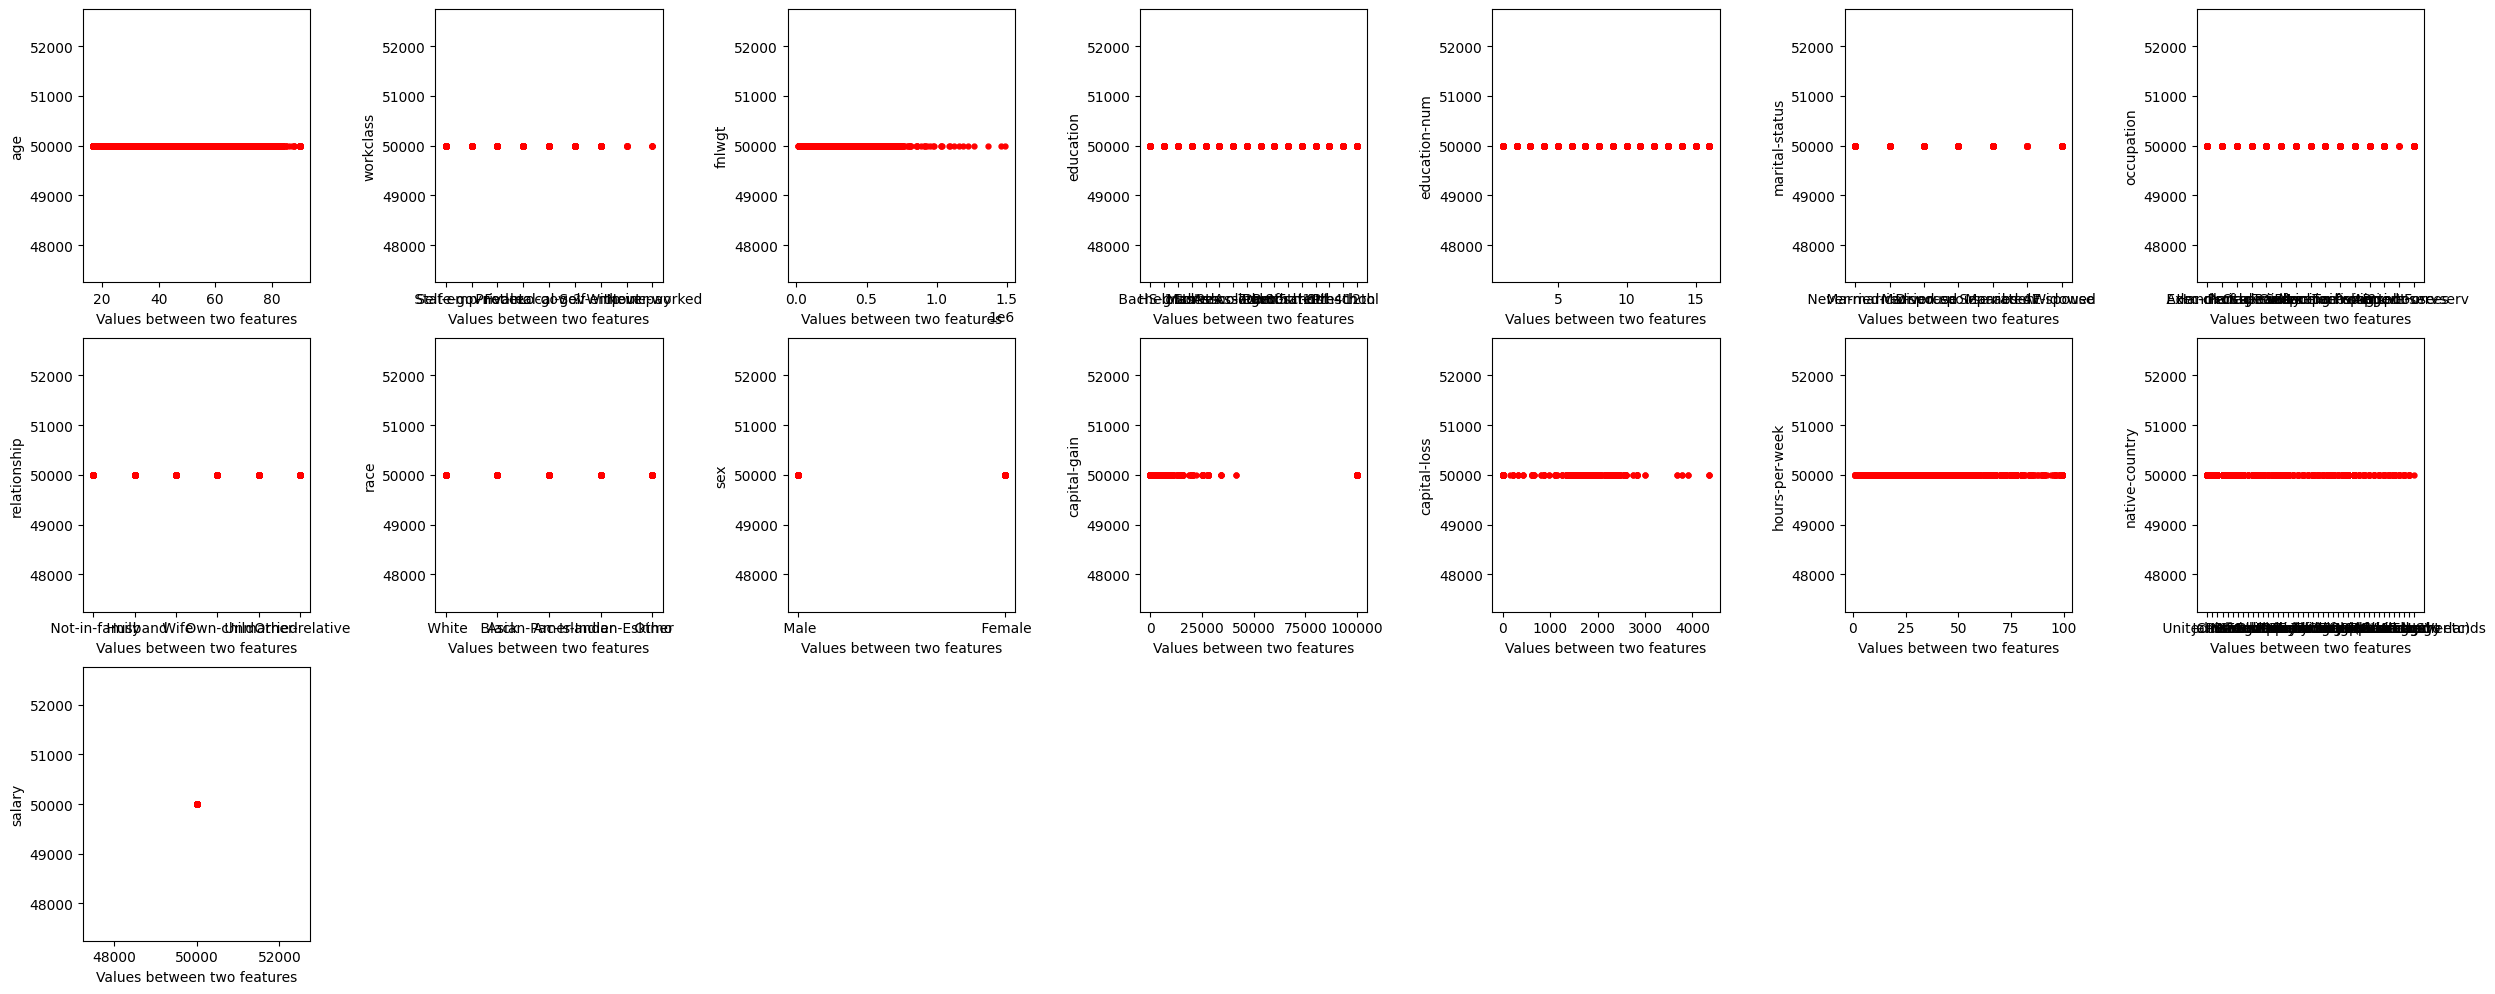

In [41]:
plt.figure(figsize = (25,10))
j = 1
for col in df.columns:
    plt.subplot(3,7,j)  
    plt.scatter(df[col],df['salary'],c='red',s=50,marker='.')
    plt.xlabel('Values between two features')
    plt.ylabel(col)
    j += 1
plt.tight_layout(pad = 0.9)
plt.show()    

array([[<AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='fnlwgt', ylabel='age'>,
        <AxesSubplot: xlabel='education-num', ylabel='age'>,
        <AxesSubplot: xlabel='capital-gain', ylabel='age'>,
        <AxesSubplot: xlabel='capital-loss', ylabel='age'>,
        <AxesSubplot: xlabel='hours-per-week', ylabel='age'>,
        <AxesSubplot: xlabel='salary', ylabel='age'>],
       [<AxesSubplot: xlabel='age', ylabel='fnlwgt'>,
        <AxesSubplot: xlabel='fnlwgt', ylabel='fnlwgt'>,
        <AxesSubplot: xlabel='education-num', ylabel='fnlwgt'>,
        <AxesSubplot: xlabel='capital-gain', ylabel='fnlwgt'>,
        <AxesSubplot: xlabel='capital-loss', ylabel='fnlwgt'>,
        <AxesSubplot: xlabel='hours-per-week', ylabel='fnlwgt'>,
        <AxesSubplot: xlabel='salary', ylabel='fnlwgt'>],
       [<AxesSubplot: xlabel='age', ylabel='education-num'>,
        <AxesSubplot: xlabel='fnlwgt', ylabel='education-num'>,
        <AxesSubplot: xlabel='education-num', yl

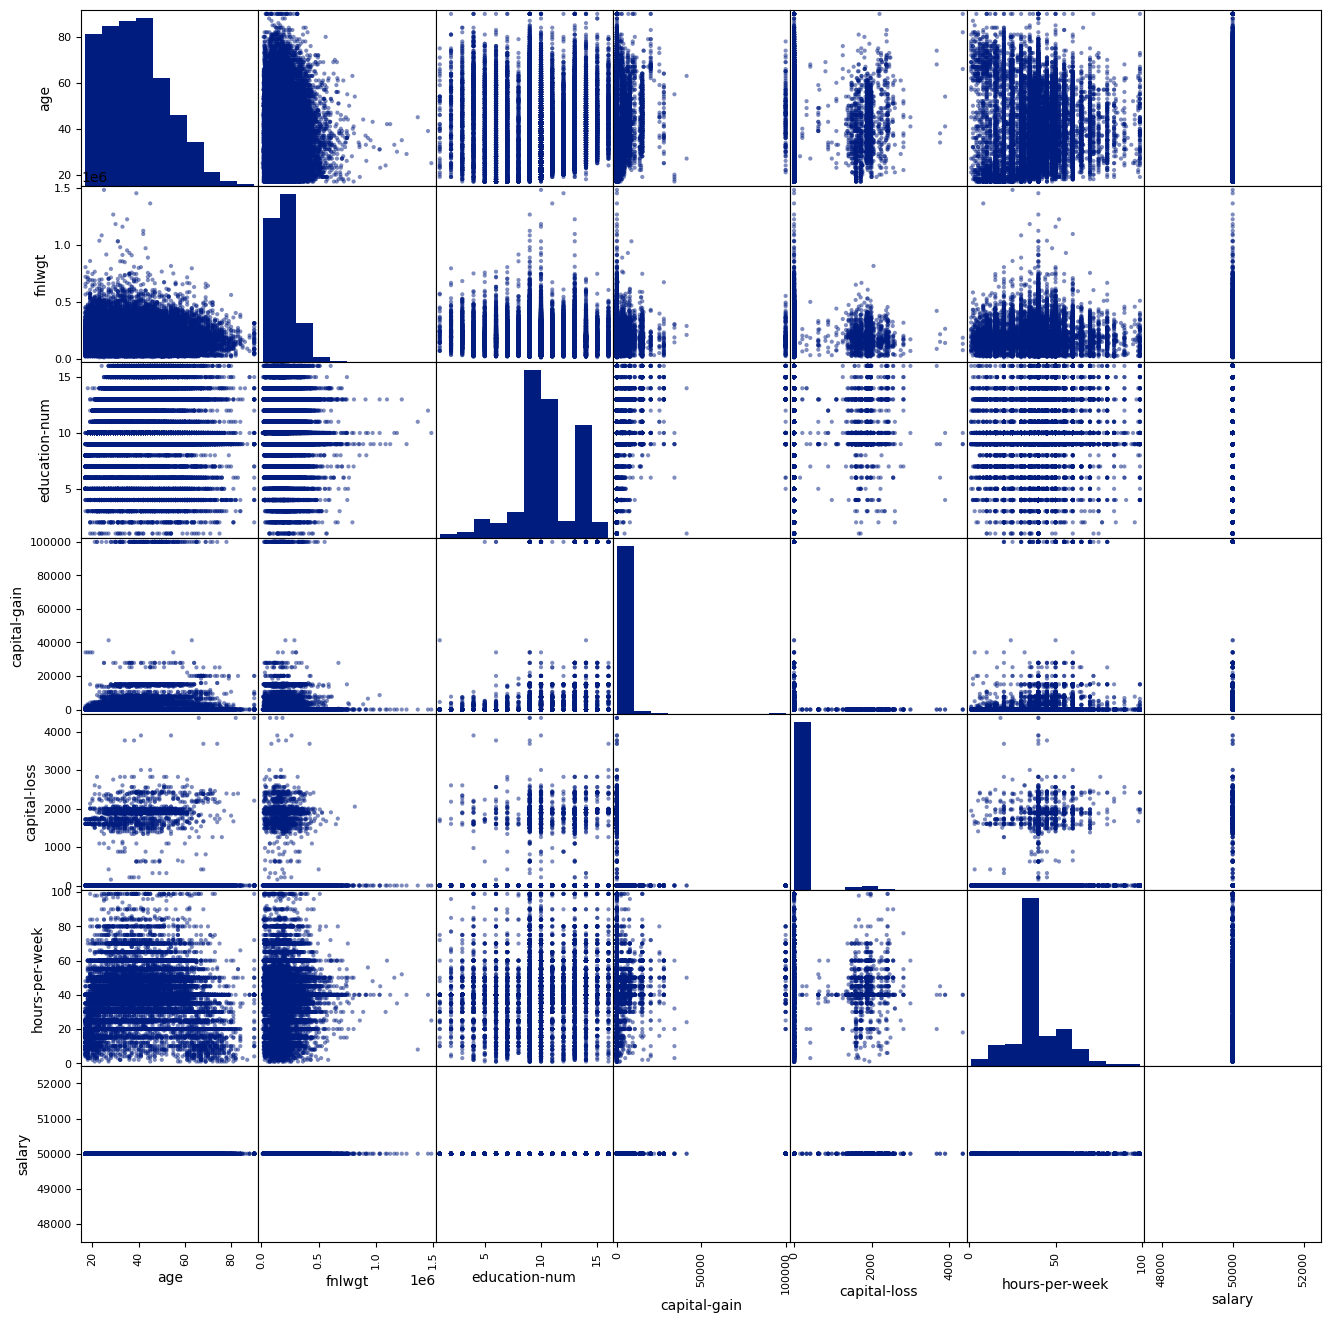

In [42]:
pd.plotting.scatter_matrix(df, figsize=(16, 16))

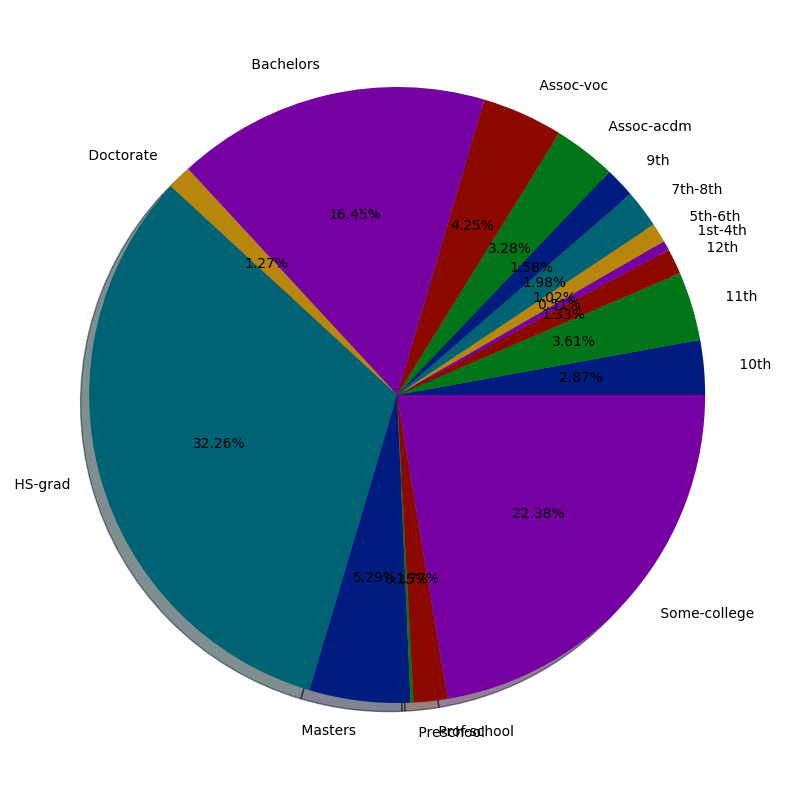

In [43]:
plt.figure(figsize = (25,10))
plt.pie(size['Count'].values,labels = size.index.values,autopct = '%0.2f%%',shadow = True) #explode seprate what you give a percentage
plt.show() 

In [ ]:
_ = df.hist(figsize=(17, 12))

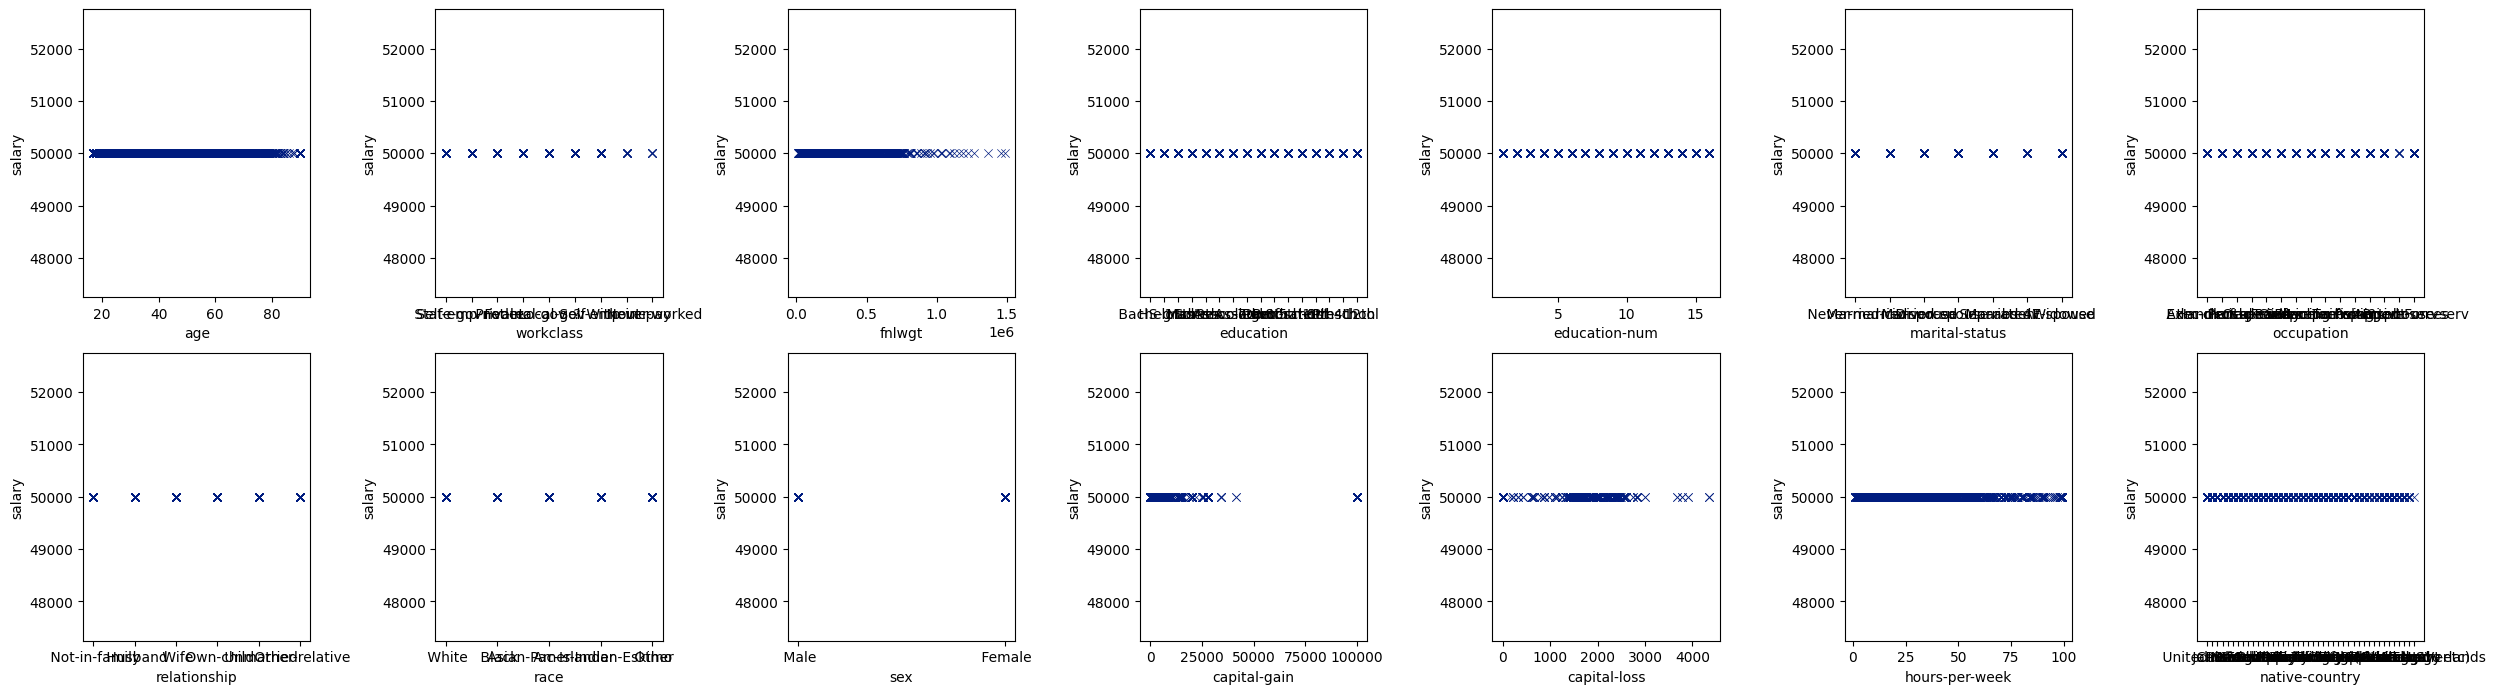

In [47]:
plt.figure(figsize=(25,10))
feature_list = list(df.columns[:-1])
i = 1
for col in feature_list:
    plt.subplot(3,7,i)  # number of columns 9 , 3*3 = 9
    sns.scatterplot(x = col,y = 'salary',data = df,marker = 'x')
    
    i += 1
plt.tight_layout(pad = 0.9)
plt.show()

ValueError: num must be 1 <= num <= 10, not 11

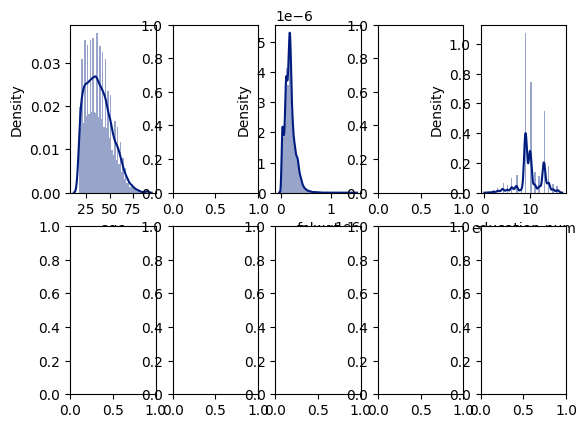

In [48]:
i = 1
for col in df.columns:
    plt.subplot(2,5,i)  # number of columns 9 , 3*3 = 9
    try:
        sns.distplot(df[col])
    except:
        pass
    i += 1
plt.tight_layout(pad = 0.9)
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[col].values)) 
        df[col] = lbl.transform(list(df[col].values))
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,50000.0
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,50000.0
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,50000.0
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,50000.0
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,50000.0


In [52]:
pd.DataFrame(df.apply(lambda x: x.max() - x.min())).rename(columns = {0:'Max - Min'})

,Max - Min
age,73.0
workclass,8.0
fnlwgt,1472420.0
education,15.0
education-num,15.0
marital-status,6.0
occupation,14.0
relationship,5.0
race,4.0
sex,1.0


In [56]:
from datasist.structdata import detect_outliers

feature_df = df.columns[:-1]

for col in feature_df:
    outliers = detect_outliers(df,0,[col])
    print(f'number of outliers in {col} : ',len(outliers))
    
for col in feature_df:
    outliers = detect_outliers(df,0,[col])
    col_median = df[col].median()
    df[col].loc[outliers] = col_median

number of outliers in age :  219
number of outliers in workclass :  9864
number of outliers in fnlwgt :  993
number of outliers in education :  3039
number of outliers in education-num :  1193
number of outliers in marital-status :  0
number of outliers in occupation :  0
number of outliers in relationship :  0
number of outliers in race :  4742
number of outliers in sex :  0
number of outliers in capital-gain :  2712
number of outliers in capital-loss :  1519
number of outliers in hours-per-week :  9002
number of outliers in native-country :  3384


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df.columns[:-1]
df[columns] = scaler.fit_transform(df[columns])

In [59]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,0.056721,0.0,-1.186684,-0.869135,1.214101,0.921857,-1.317681,-0.277864,0.0,0.703020,0.0,0.0,-0.324797,0.0,50000.0
1,0.896011,0.0,-1.119307,-0.869135,1.214101,-0.405919,-0.608370,-0.900126,0.0,0.703020,0.0,0.0,-0.324797,0.0,50000.0
2,-0.019578,0.0,0.419312,-0.081209,-0.602556,-1.733696,-0.135495,-0.277864,0.0,0.703020,0.0,0.0,-0.324797,0.0,50000.0
3,1.124909,0.0,0.641092,-0.081209,-1.510885,-0.405919,-0.135495,-0.900126,0.0,0.703020,0.0,0.0,-0.324797,0.0,50000.0
4,-0.782570,0.0,1.846641,-0.869135,1.214101,-0.405919,0.810254,2.211186,0.0,-1.422436,0.0,0.0,-0.324797,0.0,50000.0


In [61]:
feature_df = list(df.columns)
feature_df.remove('salary')
x = df[feature_df]
y = df['salary']
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.056721,0.0,-1.186684,-0.869135,1.214101,0.921857,-1.317681,-0.277864,0.0,0.703020,0.0,0.0,-0.324797,0.0
1,0.896011,0.0,-1.119307,-0.869135,1.214101,-0.405919,-0.608370,-0.900126,0.0,0.703020,0.0,0.0,-0.324797,0.0
2,-0.019578,0.0,0.419312,-0.081209,-0.602556,-1.733696,-0.135495,-0.277864,0.0,0.703020,0.0,0.0,-0.324797,0.0
3,1.124909,0.0,0.641092,-0.081209,-1.510885,-0.405919,-0.135495,-0.900126,0.0,0.703020,0.0,0.0,-0.324797,0.0
4,-0.782570,0.0,1.846641,-0.869135,1.214101,-0.405919,0.810254,2.211186,0.0,-1.422436,0.0,0.0,-0.324797,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,0.133020,0.0,-0.293079,-0.081209,-0.602556,-0.405919,0.100942,-0.900126,0.0,0.703020,0.0,0.0,-0.324797,0.0
32558,1.506405,0.0,-0.321727,-0.081209,-0.602556,2.249634,-1.317681,1.588923,0.0,-1.422436,0.0,0.0,-0.324797,0.0
32559,-1.240365,0.0,0.254725,-0.081209,-0.602556,0.921857,-1.317681,0.966661,0.0,0.703020,0.0,0.0,-0.324797,0.0
32560,1.048610,0.0,1.259702,-0.081209,-0.602556,-0.405919,-0.608370,2.211186,0.0,-1.422436,0.0,0.0,-0.324797,0.0


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)
print(cl('X_train shape : {} Rows : {} Columns : {}'.format(x_train.shape,x_train.shape[0],x_train.shape[1]), attrs = ['bold'], color = 'black'))
print(cl('X_test shape  : {} Rows : {} Columns : {}'.format(x_test.shape,x_test.shape[0],x_test.shape[1]), attrs = ['bold'], color = 'black'))
print(cl('y_train shape : {}    Rows : {} Columns : 1'.format(y_train.shape,y_train.shape[0]), attrs = ['bold'], color = 'black'))
print(cl('y_test shape  : {}    Rows : {} Columns : 1'.format(y_test.shape,y_test.shape[0]), attrs = ['bold'], color = 'black'))

print('###'*30)
print(cl('X_train samples : ', attrs = ['bold']), x_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), x_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])

print('###'*30)
print(cl('X_train samples : ', attrs = ['bold']), x_train[:1].values)
print(cl('X_test samples : ', attrs = ['bold']), x_test[0:1].values)
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10].values)
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10].values)

X_train shape : (24402, 14) Rows : 24402 Columns : 14
X_test shape  : (8135, 14) Rows : 8135 Columns : 14
y_train shape : (24402,)    Rows : 24402 Columns : 1
y_test shape  : (8135,)    Rows : 8135 Columns : 1
##########################################################################################
X_train samples :             age  workclass    fnlwgt  education  education-num  marital-status  \
4747  0.285618        0.0 -0.835023   0.312754       1.668266       -0.405919   

      occupation  relationship  race      sex  capital-gain  capital-loss  \
4747    0.810254     -0.900126   0.0  0.70302           0.0           0.0   

      hours-per-week  native-country  
4747       -0.324797             0.0  
X_test samples :              age  workclass    fnlwgt  education  education-num  \
24189 -1.545561        0.0 -1.715199  -0.081209      -1.510885   

       marital-status  occupation  relationship  race      sex  capital-gain  \
24189        0.921857   -0.135495      0.966661   0.0

In [66]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

<AxesSubplot: xlabel='salary', ylabel='Density'>

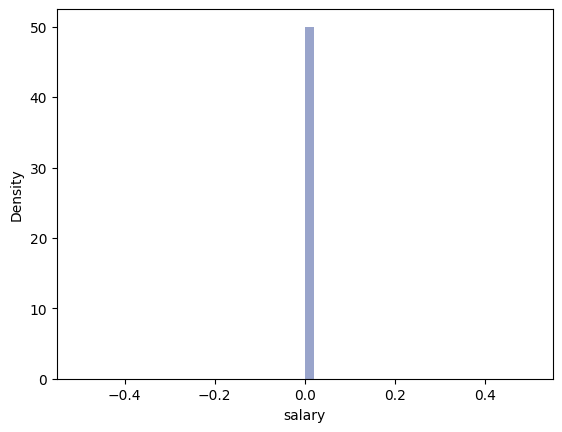

In [70]:
sns.distplot(y_test-y_pred)

In [72]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',metrics.r2_score(y_test,y_pred))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
r2_score: 1.0


In [73]:
from sklearn.model_selection import cross_val_score
# Checking the training model scores
r2_scores = cross_val_score(lr_model, x_test, y_test, cv=10)
mse_scores = cross_val_score(lr_model, x_test, y_test, cv=10,scoring='neg_mean_squared_error')
print(r2_scores)
print('-'*30)
print(mse_scores)
print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
------------------------------
[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
avg R-squared::1.000
MSE::0.000
